Perform Principal component analysis and perform clustering using first 

3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 

optimum number of clusters and check whether we have obtained same number of clusters with the original data 

(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine= pd.read_csv ("wine.csv")

In [4]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [49]:
wine.duplicated().sum()

0

In [8]:
wine1= wine.iloc[:,1:]

In [9]:
wine1.tail()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [10]:
scaled_df = scale(wine1)

In [11]:
scaled_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
model = PCA(n_components=7)

In [13]:
pcomps = model.fit_transform(scaled_df)
pcomps

array([[ 3.31675081, -1.44346263, -0.16573904, ...,  0.69304284,
        -0.22388013,  0.59642655],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.25765463,
        -0.92712024,  0.05377561],
       [ 2.51674015, -1.0311513 ,  0.98281867, ..., -0.25103312,
         0.54927605,  0.42420545],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  1.271355  ,
         0.27306792,  0.67923541],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  0.81395522,
         1.17878298,  0.63397527],
       [-3.20875816, -2.76891957,  1.01391366, ..., -0.89519259,
         0.29609218,  0.00574126]])

In [14]:
exp_var = model.explained_variance_ratio_
exp_var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679])

In [78]:
Var= np.cumsum(exp_var)
Var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795])

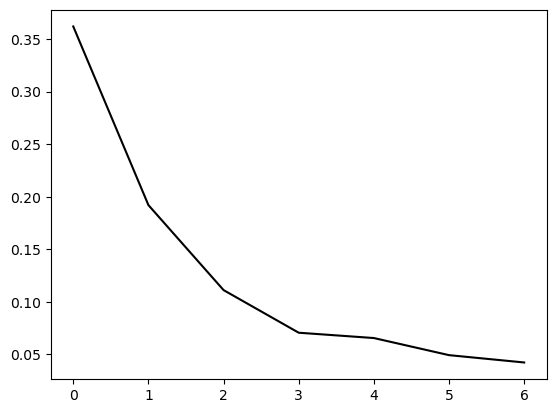

In [76]:
plt.plot(exp_var,color="black");

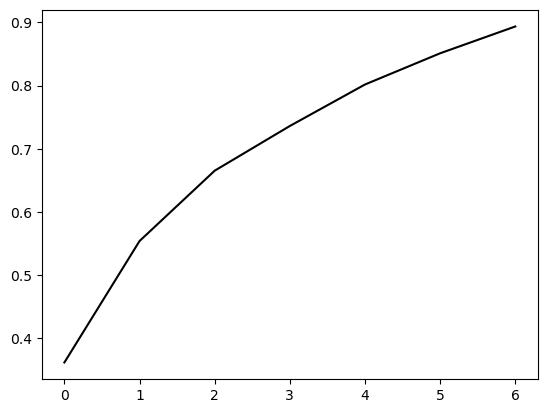

In [79]:
plt.plot(Var,color="black");

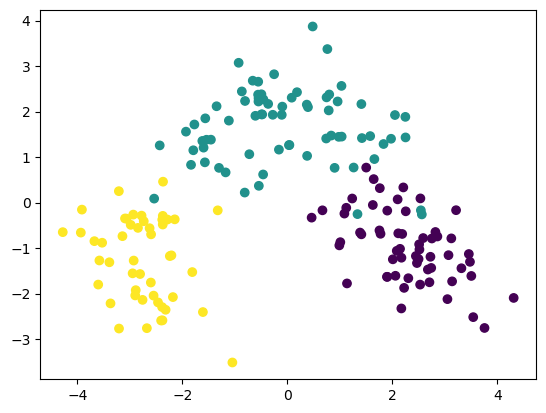

In [16]:
plt.scatter(pcomps[:,0],pcomps[:,1], c=wine['Type'])

In [17]:
final_pca=pd.concat([wine['Type'],pd.DataFrame(pcomps[:,0:2],columns=['PC1','PC2'])],axis=1)
final_pca

,Type,PC1,PC2
0,1,3.316751,-1.443463
1,1,2.209465,0.333393
2,1,2.516740,-1.031151
3,1,3.757066,-2.756372
4,1,1.008908,-0.869831
...,...,...,...
173,3,-3.370524,-2.216289
174,3,-2.601956,-1.757229
175,3,-2.677839,-2.760899
176,3,-2.387017,-2.297347


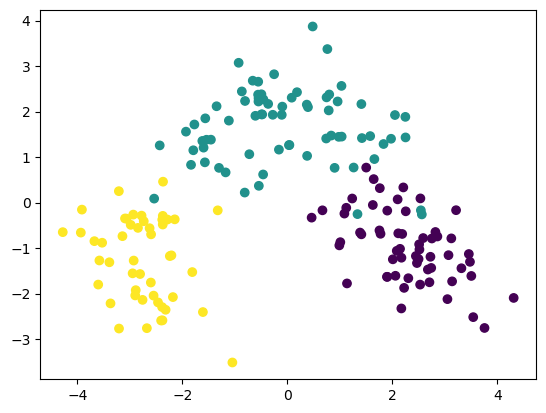

In [18]:
plt.scatter(final_pca['PC1'],final_pca['PC2'], c=wine['Type'])

# Kmeans

In [19]:
from sklearn.cluster import KMeans

In [50]:
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

In [51]:
wcss

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1175.7051928197118,
 1104.8616839625317,
 1042.3872037251417,
 988.0533283180055,
 940.708165089653,
 902.0783170433883]

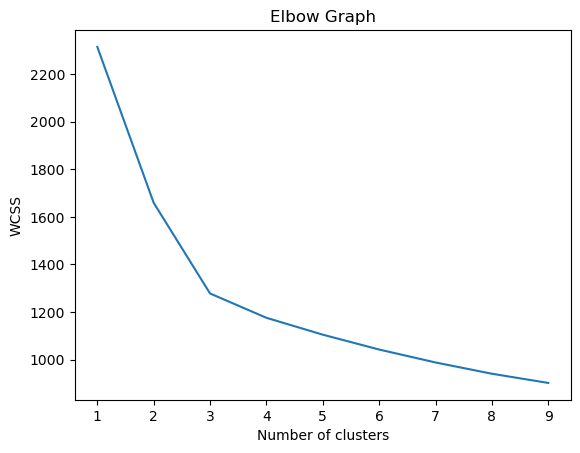

In [52]:
plt.plot(range(1,10),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

In [53]:
Kmean_model=KMeans(3,random_state=42).fit(scaled_df)
Kmean_model

KMeans(n_clusters=3, random_state=42)

In [54]:
a= Kmean_model.labels_

In [55]:
wine2=wine.copy()

In [56]:
wine2['Labels']= a

In [57]:
wine2.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


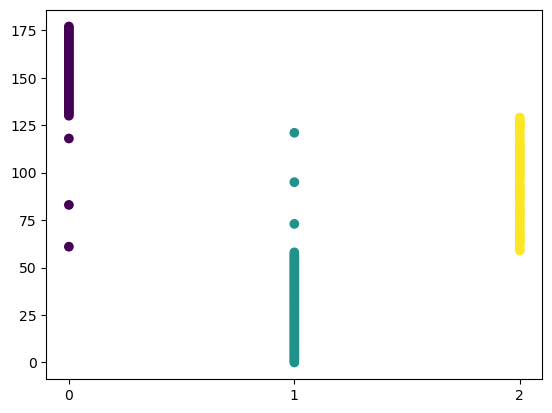

In [58]:
plt.scatter(wine2['Labels'], wine2.index, c=a , cmap='viridis')
plt.xticks([0,1,2])
plt.show()

In [29]:
grp = wine2.groupby(['Labels'])
grp

In [30]:
for x,y in grp:
    print(y)
    print('_________________________________________________________________________')

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
61      2    12.64   1.36  2.02        16.8        100     2.02        1.41   
83      2    13.05   3.86  2.32        22.5         85     1.65        1.59   
118     2    12.77   3.43  1.98        16.0         80     1.63        1.25   
130     3    12.86   1.35  2.32        18.0        122     1.51        1.25   
131     3    12.88   2.99  2.40        20.0        104     1.30        1.22   
132     3    12.81   2.31  2.40        24.0         98     1.15        1.09   
133     3    12.70   3.55  2.36        21.5        106     1.70        1.20   
134     3    12.51   1.24  2.25        17.5         85     2.00        0.58   
135     3    12.60   2.46  2.20        18.5         94     1.62        0.66   
136     3    12.25   4.72  2.54        21.0         89     1.38        0.47   
137     3    12.53   5.51  2.64        25.0         96     1.79        0.60   
138     3    13.49   3.59  2.19        19.5         

In [31]:
grp.agg(['mean','min','max'])

Type            Alcohol                   Malic              \
            mean min max       mean    min    max      mean   min   max   
Labels                                                                    
0       2.941176   2   3  13.134118  12.20  14.34  3.307255  1.24  5.65   
1       1.048387   1   2  13.676774  11.56  14.83  1.997903  1.35  4.04   
2       2.000000   2   2  12.250923  11.03  13.86  1.897385  0.74  5.80   

             Ash  ... Color       Hue              Dilution              \
            mean  ...   max      mean   min   max      mean   min   max   
Labels            ...                                                     
0       2.417647  ...  13.0  0.691961  0.48  0.98  1.696667  1.27  2.47   
1       2.466290  ...   8.9  1.065484  0.82  1.31  3.163387  2.51  4.00   
2       2.231231  ...   5.3  1.062708  0.69  1.71  2.803385  1.67  3.64   

            Proline             
               mean  min   max  
Labels                          
0        619.058824  372   880  
1       1100.225806  465  1680  
2        510.169231  278   886  

[3 rows x 42 columns]

In [32]:
from sklearn.metrics import silhouette_score
silhouette_score(wine2.iloc[:,0:], a)

0.1943874637643172

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
wine3= wine.copy()

In [68]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [69]:
labels = model.labels_
labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [70]:
wine3['Label']=labels

In [71]:
grp1 = wine3.groupby(wine3['Label'])
grp1

In [72]:
for a,b in grp:
    print(b)
    print("_____________________________________________________________________")

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
61      2    12.64   1.36  2.02        16.8        100     2.02        1.41   
83      2    13.05   3.86  2.32        22.5         85     1.65        1.59   
118     2    12.77   3.43  1.98        16.0         80     1.63        1.25   
130     3    12.86   1.35  2.32        18.0        122     1.51        1.25   
131     3    12.88   2.99  2.40        20.0        104     1.30        1.22   
132     3    12.81   2.31  2.40        24.0         98     1.15        1.09   
133     3    12.70   3.55  2.36        21.5        106     1.70        1.20   
134     3    12.51   1.24  2.25        17.5         85     2.00        0.58   
135     3    12.60   2.46  2.20        18.5         94     1.62        0.66   
136     3    12.25   4.72  2.54        21.0         89     1.38        0.47   
137     3    12.53   5.51  2.64        25.0         96     1.79        0.60   
138     3    13.49   3.59  2.19        19.5         

In [73]:
grp1.agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Label,,,,,,,,,,,,,,
0,1.260870,13.406087,1.898986,2.305797,16.772464,105.000000,2.643913,2.668986,0.296667,1.832899,4.990725,1.069652,2.970000,984.695652
1,1.862069,12.415172,1.989828,2.381379,21.117241,93.844828,2.424828,2.339828,0.366897,1.678103,3.280345,1.057931,2.978448,573.379310
2,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196


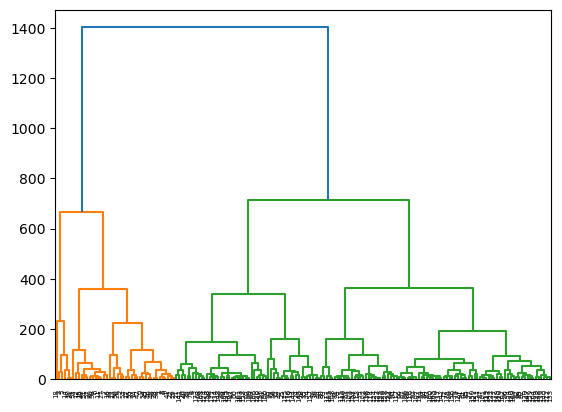

In [74]:
from scipy.cluster import hierarchy
hr = hierarchy.linkage(wine3, method='complete')
dn = hierarchy.dendrogram(hr)

In [75]:
silhouette_score(wine2.iloc[:,0:], labels)

0.06649796092524958

# TSNE

In [42]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [43]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
x= wine.iloc[:,1:]

In [45]:
y= wine.iloc[:,0]

In [46]:
tnse = TSNE(n_components=2, random_state=42)

In [47]:
a_tsne = tnse.fit_transform(x)
a_tsne

array([[-8.87718678e+00,  7.70877361e+00],
       [-8.76888180e+00,  7.32411718e+00],
       [-1.06474333e+01,  9.08424664e+00],
       [-1.26989689e+01,  1.10195866e+01],
       [-2.84865189e+00,  1.49861872e+00],
       [-1.23488321e+01,  1.11472282e+01],
       [-1.13785410e+01,  1.04069090e+01],
       [-1.14399176e+01,  1.04616013e+01],
       [-9.11386681e+00,  6.88805771e+00],
       [-8.63794136e+00,  7.27806711e+00],
       [-1.26604652e+01,  1.12946901e+01],
       [-1.12551250e+01,  1.02833376e+01],
       [-1.19850178e+01,  1.03236303e+01],
       [-1.02329168e+01,  8.61629295e+00],
       [-1.28161516e+01,  1.13458357e+01],
       [-1.16412067e+01,  1.05198574e+01],
       [-1.17465887e+01,  9.83210850e+00],
       [-9.96743393e+00,  8.33091068e+00],
       [-1.30572472e+01,  1.14436512e+01],
       [-5.53844404e+00,  3.47371936e+00],
       [-3.97760534e+00,  2.43219233e+00],
       [-3.85347176e+00,  2.00449610e+00],
       [-8.48429298e+00,  7.10666847e+00],
       [-8.

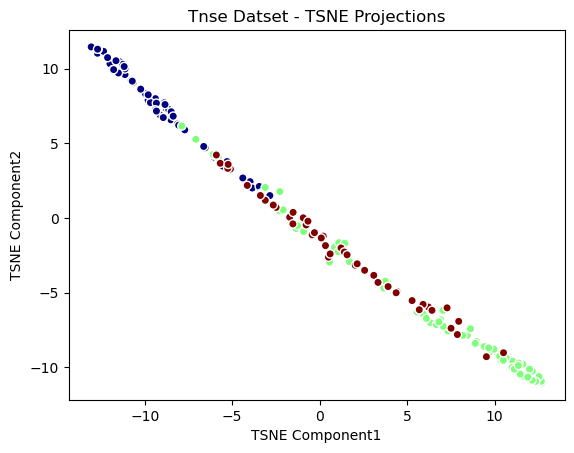

In [48]:
plt.scatter(a_tsne[:,0], a_tsne[:,1], c=y, cmap='jet', edgecolor= "white")
plt.title('Tnse Datset - TSNE Projections')
plt.xlabel('TSNE Component1')
plt.ylabel('TSNE Component2')
plt.show()